In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("C:\\Users\\HP\\Downloads\\GOLD.csv")
data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [3]:
data.describe()

,Price,Open,High,Low,Pred,new
count,512.000000,512.000000,512.000000,512.000000,411.000000,512.000000
mean,30364.583984,30368.412109,30491.089844,30243.320312,341.712895,245.161859
std,1284.378623,1296.856656,1307.031684,1271.936410,271.075609,205.788897
min,27812.000000,27805.000000,27887.000000,27620.000000,-146.000000,11.109814
25%,29432.500000,29436.750000,29499.750000,29345.750000,156.500000,101.369172
50%,30427.500000,30399.500000,30545.000000,30286.000000,299.000000,184.537244
75%,31271.750000,31300.000000,31447.500000,31160.750000,475.000000,320.835031
max,33753.000000,34247.000000,34400.000000,33680.000000,2210.000000,1407.321485


In [4]:
data.Pred

0      738.0
1     -146.0
2       30.0
3      357.0
4      124.0
       ...  
507      NaN
508      NaN
509      NaN
510      NaN
511      NaN
Name: Pred, Length: 512, dtype: float64

In [5]:
test_data = data[data.Pred.isnull()==True]
t_data = test_data.iloc[:,1:5]

In [6]:
x = data.iloc[:411,1:5]
y = data.Pred[0:411]
x

,Price,Open,High,Low
0,28060,28400,28482,28025
1,28184,28136,28382,28135
2,28119,28145,28255,28097
3,27981,28125,28192,27947
4,28007,28060,28146,27981
...,...,...,...,...
406,30964,30874,31085,30874
407,30926,30830,30970,30825
408,31005,31039,31196,30974
409,31440,31011,31480,30941


In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

In [8]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
test_data.Pred = reg.predict(t_data)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
y_pred = reg.predict(x_test)

In [11]:
test_data

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
411,"Dec 11, 2018",31812,31850,31850,31618,10.53K,-0.26%,852.0,195.423493
412,"Dec 12, 2018",31626,31749,31749,31582,7.57K,-0.58%,422.0,44.232664
413,"Dec 13, 2018",31414,31550,31600,31337,8.43K,-0.67%,530.0,127.646233
414,"Dec 14, 2018",31437,31440,31514,31384,6.75K,0.07%,144.0,127.219539
415,"Dec 17, 2018",31501,31369,31530,31291,5.97K,0.20%,415.0,372.603976
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,535.0,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,438.0,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,269.0,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,601.0,48.365693


In [12]:
print("Mean Sqaured Error :",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred))
print("r2 score :",r2_score(y_test,y_pred))

Mean Sqaured Error : 1.2430444197601278e-23
Mean Absolute Error : 3.5256616903065017e-12
r2 score : 1.0


In [13]:
x_new = data.iloc[:,1:5]
y_new = data['new']

In [14]:
x_train_new,x_test_new,y_train_new,y_test_new = train_test_split(x_new,y_new,test_size = 0.20)

In [15]:
reg1 = LinearRegression()
reg1.fit(x_train_new,y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_new_pred = reg1.predict(x_test_new)

In [17]:
y_test_new = np.array(y_test_new).reshape(-1,1)
y_new_pred = y_new_pred.reshape(-1,1)

In [18]:
reg1.score(x_test_new,y_test_new)

0.9999919384735243

In [19]:
print("Mean Sqaured Error :",mean_squared_error(y_test_new,y_new_pred))
print("Mean Absolute Error :",mean_absolute_error(y_test_new,y_new_pred))
print("r2 score :",r2_score(y_test_new,y_new_pred))

Mean Sqaured Error : 0.35928003737461445
Mean Absolute Error : 0.44454515885341717
r2 score : 0.9999919384735244


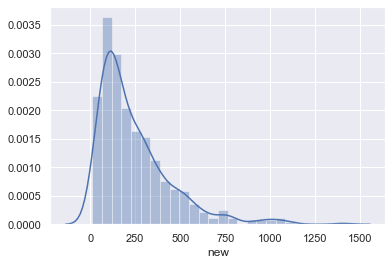

In [20]:
sns.distplot(data.new)

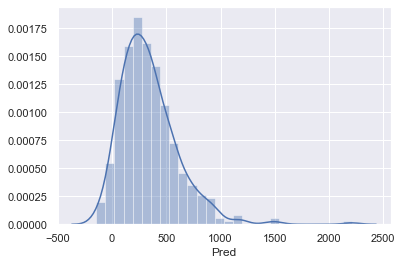

In [21]:
sns.distplot(data.Pred[0:411])

In [22]:
new_data = pd.concat([data.iloc[:411,:], test_data],axis = 0)
new_data

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,535.0,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,438.0,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,269.0,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,601.0,48.365693


In [24]:
print(nifty)
lalpath

            Date      Open      High       Low     Close  Shares Traded  \
0    15-May-2017   9433.55   9449.25   9423.10   9445.40      145163953   
1    16-May-2017   9461.00   9517.20   9456.35   9512.25      171709433   
2    17-May-2017   9517.60   9532.60   9486.10   9525.75      211856040   
3    18-May-2017   9453.20   9489.10   9418.10   9429.45      199340647   
4    19-May-2017   9469.90   9505.75   9390.75   9427.90      259861396   
..           ...       ...       ...       ...       ...            ...   
489  07-May-2019  11651.50  11657.05  11484.45  11497.90      337495624   
490  08-May-2019  11478.70  11479.10  11346.95  11359.45      372826025   
491  09-May-2019  11322.40  11357.60  11255.05  11301.80      373028059   
492  10-May-2019  11314.15  11345.80  11251.05  11278.90      387323416   
493  13-May-2019  11258.70  11300.20  11125.60  11148.20      357586433   

     Turnover (Rs. Cr)  
0              7790.97  
1              9209.89  
2             10726.23  

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,LALPATHLAB,EQ,15-May-2017,891.15,895.0,914.15,881.00,912.00,900.60,889.35,257655,2.291453e+08,15451,174775,67.83
1,LALPATHLAB,EQ,16-May-2017,900.60,910.0,925.00,895.05,909.40,910.95,914.57,104896,9.593430e+07,13001,75813,72.27
2,LALPATHLAB,EQ,17-May-2017,910.95,913.0,925.00,909.00,912.05,911.70,917.19,72460,6.645960e+07,2802,53829,74.29
3,LALPATHLAB,EQ,18-May-2017,911.70,908.0,919.35,903.05,906.00,909.75,914.12,37707,3.446889e+07,2731,24836,65.87
4,LALPATHLAB,EQ,19-May-2017,909.75,917.0,917.00,905.80,910.00,910.25,910.61,81082,7.383375e+07,4430,69926,86.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,LALPATHLAB,EQ,07-May-2019,1024.95,1015.7,1031.95,1006.90,1013.00,1013.10,1020.66,20113,2.052851e+07,3628,11587,57.61
491,LALPATHLAB,EQ,08-May-2019,1013.10,1014.0,1019.85,1001.90,1002.00,1006.10,1010.90,18048,1.824473e+07,4175,11239,62.27
492,LALPATHLAB,EQ,09-May-2019,1006.10,1014.0,1014.00,977.70,979.90,982.90,987.36,60539,5.977355e+07,8169,37303,61.62
493,LALPATHLAB,EQ,10-May-2019,982.90,989.9,994.30,963.60,980.00,980.65,980.71,30568,2.997840e+07,4618,19097,62.47


In [37]:
nifty = pd.read_csv("C:\\Users\\HP\\Downloads\\Nifty50\\Nifty50.csv")
lalpath = pd.read_csv("week3.csv")

In [40]:
daily_prices = pd.concat([nifty['Close'][nifty.shape[0]-91:], lalpath['Close Price'][lalpath.shape[0]-91:]], axis=1)
daily_prices.columns = ['nifty', 'lalpath']

# check the head of the dataframe
print(daily_prices.head())

# calculate monthly returns
daily_returns = daily_prices.pct_change(1)
clean_daily_returns = daily_returns.dropna(axis=0)  # drop first missing row
print(clean_daily_returns.head())

        nifty  lalpath
403  10859.90   908.50
404  10862.55   910.30
405  10910.10   924.80
406  10792.50   915.20
407  10672.25   913.05
        nifty   lalpath
404  0.000244  0.001981
405  0.004377  0.015929
406 -0.010779 -0.010381
407 -0.011142 -0.002349
408  0.005163  0.029626


In [41]:
import statsmodels.api as sm
# split dependent and independent variable
X = clean_daily_returns['lalpath']
y = clean_daily_returns['nifty']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  nifty   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.635
Date:                Thu, 24 Sep 2020   Prob (F-statistic):             0.0599
Time:                        20:31:05   Log-Likelihood:                 322.93
No. Observations:                  90   AIC:                            -641.9
Df Residuals:                      88   BIC:                            -636.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.343      0.7

In [49]:
monthly_data = pd.DataFrame(lalpath["Close Price"])
monthly_data['Close'] = nifty['Close']
monthly_data['Month'] = lalpath['Month']
monthly_data

,Close Price,Close,Month
0,900.60,9445.40,5
1,910.95,9512.25,5
2,911.70,9525.75,5
3,909.75,9429.45,5
4,910.25,9427.90,5
...,...,...,...
489,1013.10,11497.90,5
490,1006.10,11359.45,5
491,982.90,11301.80,5
492,980.65,11278.90,5


In [55]:
g = monthly_data.groupby('Month')
g.first()

,Close Price,Close
Month,,
1,884.65,10435.55
2,910.45,11016.90
3,910.50,10458.35
4,871.65,10211.80
5,900.60,9445.40
6,900.60,9616.10
7,775.45,9615.00
8,824.10,10114.65
9,810.25,9974.40


In [64]:
for n,grp in g:
    x = g['Close Price'].pct_change(1)
    y = g['Close'].pct_change(1)
    x = x.dropna(axis=0)
    y = y.dropna(axis=0)
    x1 = sm.add_constant(x)
    model1 = sm.OLS(y, x1)
    results = model1.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     401.5
Date:                Thu, 24 Sep 2020   Prob (F-statistic):           2.37e-65
Time:                        21:03:12   Log-Likelihood:                 1431.5
No. Observations:                 482   AIC:                            -2859.
Df Residuals:                     480   BIC:                            -2851.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0011      0.001      1.883      

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     401.5
Date:                Thu, 24 Sep 2020   Prob (F-statistic):           2.37e-65
Time:                        21:03:13   Log-Likelihood:                 1431.5
No. Observations:                 482   AIC:                            -2859.
Df Residuals:                     480   BIC:                            -2851.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0011      0.001      1.883      